## 1. Importing  Necessary Libraries

In [13]:
# import all libraries and dependencies for dataframe
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

# import all libraries and dependencies for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50) 
pd.set_option('display.max_colwidth', None) 

# for performing  ANOVA test
from scipy.stats import f_oneway
from scipy.stats import shapiro


from pandas import factorize

# import all libraries and dependencies for machine learning
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


# import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn import metrics

## 2. Reading & Understanding the Data

In [14]:
url  = "https://raw.githubusercontent.com/Latentview/Hackathon/main/Used cars_price_prediction (2).csv"
url = url.replace(" ", "%20") # Replacing space in url with %20 as it corresponds to whitespace in URL-encoding

df = pd.read_csv(url)
ndf = df
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [15]:
# df.to_csv("Car_Price_Latenview.csv") # Save into csv file

In [16]:
df.shape

(19237, 18)

The data set contains 19237 rows and 18 columns

In [17]:
df.info() # getting information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

From above we can conclude that there aren't any null values in the dataset

### 2.1 Checking for null values

In [18]:
df.isna().mean()*100

ID                  0.0
Price               0.0
Levy                0.0
Manufacturer        0.0
Model               0.0
Prod. year          0.0
Category            0.0
Leather interior    0.0
Fuel type           0.0
Engine volume       0.0
Mileage             0.0
Cylinders           0.0
Gear box type       0.0
Drive wheels        0.0
Doors               0.0
Wheel               0.0
Color               0.0
Airbags             0.0
dtype: float64

In [19]:
df.isnull().any()

ID                  False
Price               False
Levy                False
Manufacturer        False
Model               False
Prod. year          False
Category            False
Leather interior    False
Fuel type           False
Engine volume       False
Mileage             False
Cylinders           False
Gear box type       False
Drive wheels        False
Doors               False
Wheel               False
Color               False
Airbags             False
dtype: bool

In [20]:
# Checking for missing values in the dataset
df_null = df.isna().mean().round(4) * 100

df_null.sort_values(ascending=False)

ID                  0.0
Price               0.0
Color               0.0
Wheel               0.0
Doors               0.0
Drive wheels        0.0
Gear box type       0.0
Cylinders           0.0
Mileage             0.0
Engine volume       0.0
Fuel type           0.0
Leather interior    0.0
Category            0.0
Prod. year          0.0
Model               0.0
Manufacturer        0.0
Levy                0.0
Airbags             0.0
dtype: float64

In [21]:
df.describe() # getting the summary statistics of the dataset

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


### 2.2 Checking for duplicate rows

In [22]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
19232    False
19233    False
19234    False
19235    False
19236    False
Length: 19237, dtype: bool

In [23]:
duplicate_rows = df[df.duplicated()]
duplicate_rows.shape

(313, 18)

We can see that there 3512 duplicate rows. So they must be removed.

In [24]:
duplicate_rows = duplicate_rows.sort_values(by=['Price', 'Model', 'Prod. year'])
duplicate_rows.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
11988,45777718,30,-,TOYOTA,Prius,2007,Hatchback,No,LPG,1.5,198000 km,4.0,Tiptronic,Front,04-May,Left wheel,White,4
6776,45815359,47,1493,LEXUS,RX 350,2016,Jeep,Yes,Petrol,3.5,65981 km,6.0,Automatic,Front,04-May,Left wheel,Black,12
10264,45815359,47,1493,LEXUS,RX 350,2016,Jeep,Yes,Petrol,3.5,65981 km,6.0,Automatic,Front,04-May,Left wheel,Black,12
11525,45815359,47,1493,LEXUS,RX 350,2016,Jeep,Yes,Petrol,3.5,65981 km,6.0,Automatic,Front,04-May,Left wheel,Black,12
16620,45815359,47,1493,LEXUS,RX 350,2016,Jeep,Yes,Petrol,3.5,65981 km,6.0,Automatic,Front,04-May,Left wheel,Black,12


In [25]:
 df['Doors'].unique()

array(['04-May', '02-Mar', '>5'], dtype=object)

We can see that the **Doors** column contains irrelevant values.

## 3. Cleaning the Data

### 3.1 Dropping unnecessary column

In [26]:
df = df.drop(4, axis = 0)
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
5,45802912,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931 km,4.0,Automatic,Front,04-May,Left wheel,White,4


In [27]:
# dropping the 'ID' column as it does not affect the prices of the car
# also dropping 'Doors' column
df = df.drop(['ID', 'Doors'], axis = 1)
df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Left wheel,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,Left wheel,White,0
5,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931 km,4.0,Automatic,Front,Left wheel,White,4


In [28]:
df.shape

(19236, 16)

### 3.2 Removing Duplicates

In [29]:
# Removing duplicate rows by keeping the first duplicate row as unique
df = df.drop_duplicates(keep='first')
df.shape

(15724, 16)

### 3.3 Converting the columns into appropriate data type

In [30]:
# separating object columns
obj_col = df.select_dtypes(include='object').columns
obj_col

Index(['Levy', 'Manufacturer', 'Model', 'Category', 'Leather interior',
       'Fuel type', 'Engine volume', 'Mileage', 'Gear box type',
       'Drive wheels', 'Wheel', 'Color'],
      dtype='object')

In [31]:
# separating numerical columns
num_col = obj_col[[0,7]]
num_col

Index(['Levy', 'Mileage'], dtype='object')

In [32]:
# separating categorical columns
cat_col = [i for i in obj_col if i not in num_col] 
cat_col

['Manufacturer',
 'Model',
 'Category',
 'Leather interior',
 'Fuel type',
 'Engine volume',
 'Gear box type',
 'Drive wheels',
 'Wheel',
 'Color']

In [33]:
df['Mileage'].head()

0    186005 km
1    192000 km
2    200000 km
3    168966 km
5    160931 km
Name: Mileage, dtype: object

In [34]:
# removing 'km' and whitespace from 'Mileage' column
df['Mileage'] = df['Mileage'].replace('km', '', regex=True)
df['Mileage'].head()

0    186005 
1    192000 
2    200000 
3    168966 
5    160931 
Name: Mileage, dtype: object

In [35]:
# converting columns to numeric
df[num_col] = df[num_col].apply(pd.to_numeric, errors='coerce')
df[num_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15724 entries, 0 to 19236
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Levy     10040 non-null  float64
 1   Mileage  15724 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 368.5 KB


In [36]:
# updating numerical caloumns arrray
num_col = df.select_dtypes(exclude='object').columns
df[num_col].head()

,Price,Levy,Prod. year,Mileage,Cylinders,Airbags
0,13328,1399.0,2010,186005,6.0,12
1,16621,1018.0,2011,192000,6.0,8
2,8467,NaN,2006,200000,4.0,2
3,3607,862.0,2011,168966,4.0,0
5,39493,891.0,2016,160931,4.0,4


In [37]:
df[cat_col] = df[cat_col].astype(str)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15724 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             15724 non-null  int64  
 1   Levy              10040 non-null  float64
 2   Manufacturer      15724 non-null  object 
 3   Model             15724 non-null  object 
 4   Prod. year        15724 non-null  int64  
 5   Category          15724 non-null  object 
 6   Leather interior  15724 non-null  object 
 7   Fuel type         15724 non-null  object 
 8   Engine volume     15724 non-null  object 
 9   Mileage           15724 non-null  int64  
 10  Cylinders         15724 non-null  float64
 11  Gear box type     15724 non-null  object 
 12  Drive wheels      15724 non-null  object 
 13  Wheel             15724 non-null  object 
 14  Color             15724 non-null  object 
 15  Airbags           15724 non-null  int64  
dtypes: float64(2), int64(4), object(10)
memo

## 4. Exploratory Data Analysis

<AxesSubplot:>

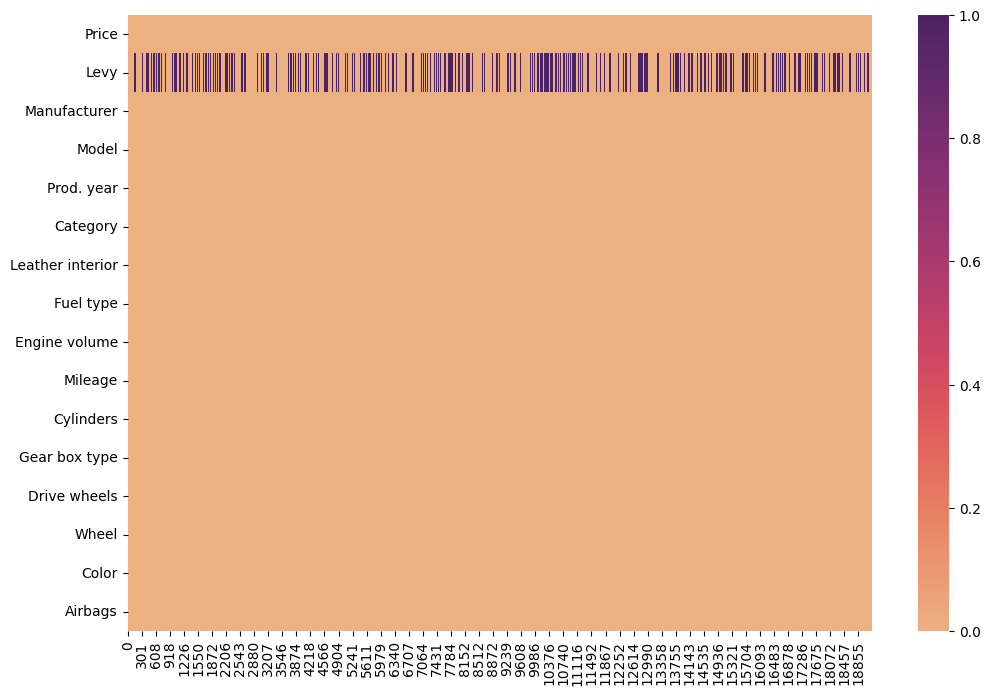

In [39]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isna().transpose(),cmap="flare")

After conversion of column data type sinto appropiate ones we can see that **'Levy'** column have empty values.

In [40]:
# Checking for missing values in the dataset
df_null = df.isna().mean().round(4) * 100

df_null.sort_values(ascending=False).head()

Levy            36.15
Price            0.00
Manufacturer     0.00
Model            0.00
Prod. year       0.00
dtype: float64

In [41]:
#  Imputing the missing value
df['Levy'] = df['Levy'].fillna(df['Levy'].median())

In [42]:
# Checking for missing values in the dataset
df_null = df.isna().mean().round(4) * 100

df_null.sort_values(ascending=False).head()

Price           0.0
Levy            0.0
Manufacturer    0.0
Model           0.0
Prod. year      0.0
dtype: float64

Now there are no missing values

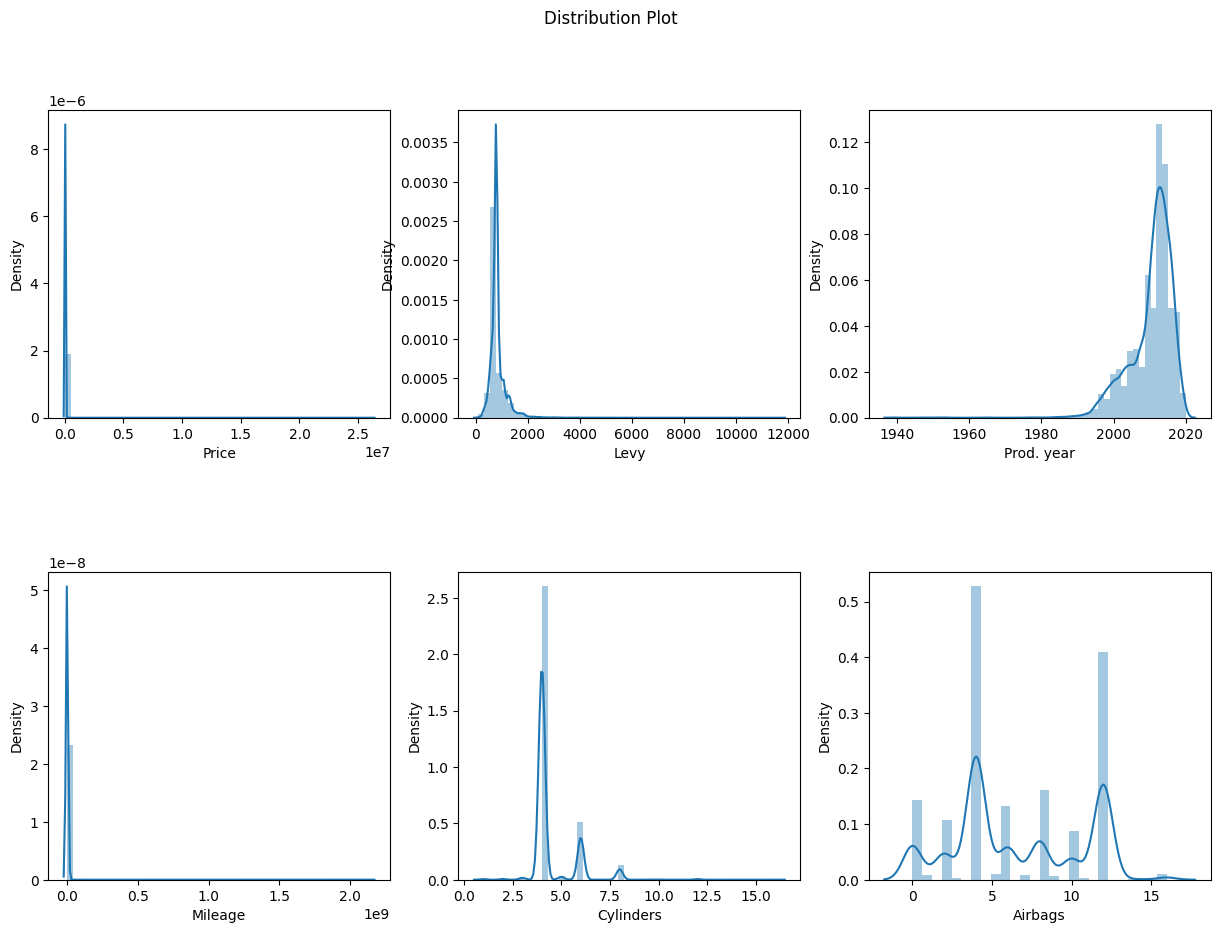

<Figure size 1000x1000 with 0 Axes>

In [43]:
# Plotting distribution curve
fig, axes = plt.subplots(2,3, figsize=(15,10))
plt.figure(figsize=(10,10))
for i, col  in enumerate(num_col):
    sns.distplot(df[col], ax=axes[i//3, i%3])
fig.suptitle("Distribution Plot")
fig.subplots_adjust(hspace=0.5)

We can conclude that **Price, Mileage** are right skewed while **Prod. year** is left skewed

**In Shapiro-Wilk Normality Test :**

H0 : The data are normally distributed

In [44]:
for i in range(len(num_col)):
    stat,p = shapiro(df[num_col[i]])
    print(num_col[i])
    print('P_value =  ' , (p))
    print("*******************************")

Price
P_value =   0.0
*******************************
Levy
P_value =   0.0
*******************************
Prod. year
P_value =   0.0
*******************************
Mileage
P_value =   0.0
*******************************
Cylinders
P_value =   0.0
*******************************
Airbags
P_value =   0.0
*******************************


According to the P_value obtained from the Shapiro test (p_value < 5%), 
we reject our null hypothesis 

(H0) --> So the numerical fields do not follow the normal distribution. 

Thus, our numerical column are not **normally distributed**

### 4.1 Outlier Detection

In [45]:
def outlier_detect(df, col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    return df[((df[col] < (q1_col - 1.5 * iqr_col)) |(df[col] > (q3_col + 1.5 * iqr_col)))]

# -------------------------------------------
def lower_outlier(df, col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    lower = df[(df[col] < (q1_col - 1.5 * iqr_col))]
    return lower

# -------------------------------------------
def upper_outlier(df, col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    upper = df[(df[col] > (q3_col + 1.5 * iqr_col))]
    return upper

# -------------------------------------------
def replace_upper(df, col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    tmp = 9999999
    upper = q3_col + 1.5 * iqr_col
    df[col] = df[col].where(lambda x: (x < (upper)), tmp)
    df[col] = df[col].replace(tmp, upper)
    print('outlire replace with upper bound - {}' .format(col)) 
    
# -------------------------------------------
def replace_lower(df, col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    tmp = 1111111
    lower = q1_col - 1.5 * iqr_col
    df[col] = df[col].where(lambda x: (x > (lower)), tmp)
    df[col] = df[col].replace(tmp, lower)
    print('outlire replace with lower bound - {}' .format(col)) 


In [46]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

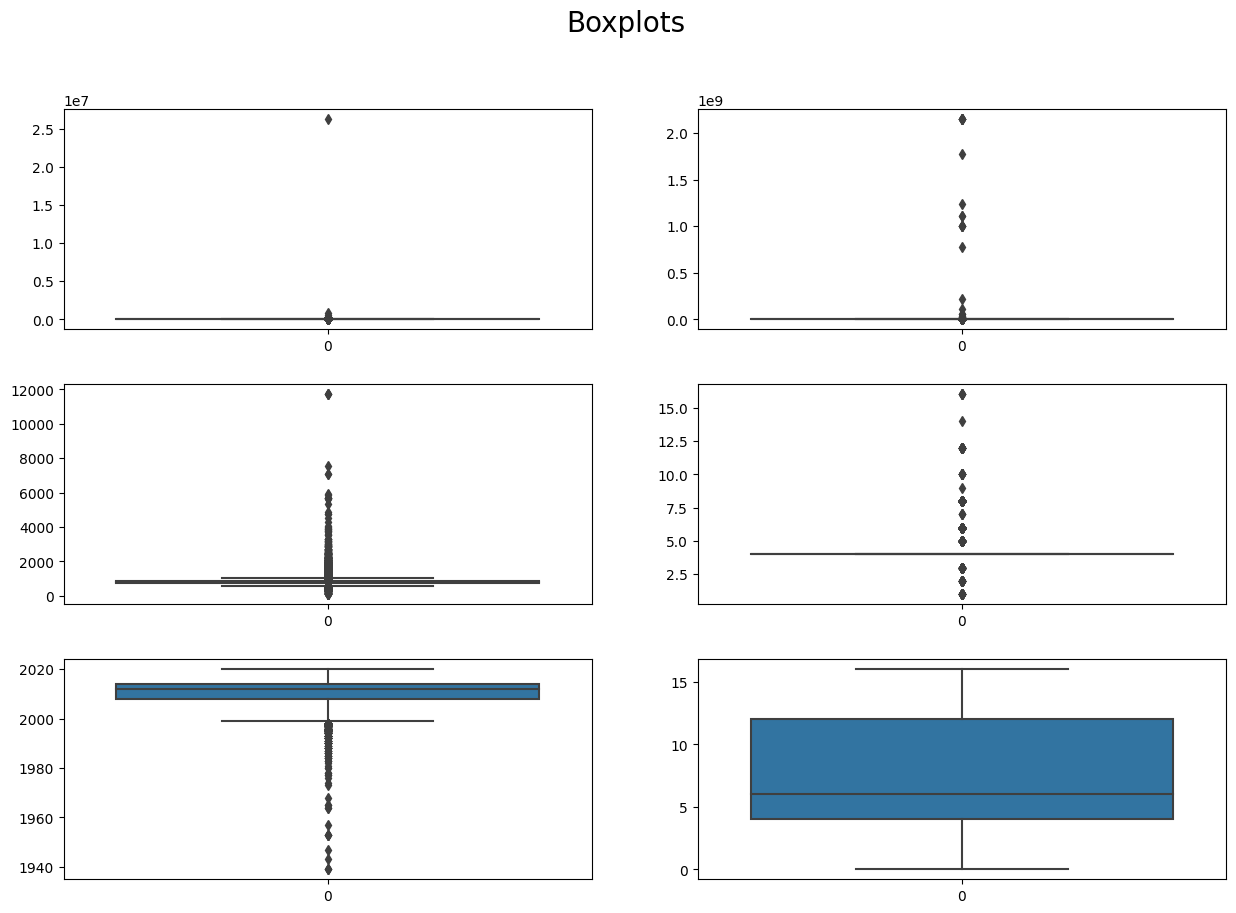

<Figure size 1000x1000 with 0 Axes>

In [47]:
# Plotting boxplot
fig, axes = plt.subplots(3,2, figsize=(15,10))
plt.figure(figsize=(10,10))
for i, col  in enumerate(num_col):
    sns.boxplot(df[col], ax=axes[i%3, i//3])
fig.suptitle("Boxplots", fontsize=20)
fig.subplots_adjust(hspace=0.25)

We can see that there may be outliers in columns **Price, Levy, Prod. year, Mileage & Cylinders** 

### 4.2 Handling outliers 

In [48]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [49]:
for i in range(len(num_col)):
    print("IQR => {}: {}".format(num_col[i],(outlier_detect(df[num_col],num_col[i]).shape[0])))

IQR => Price: 955
IQR => Levy: 3707
IQR => Prod. year: 756
IQR => Mileage: 506
IQR => Cylinders: 3446
IQR => Airbags: 0


In [50]:
outlier = []
for i in range(len(num_col)):
    if outlier_detect(df[num_col],num_col[i]).shape[0] !=0:
        outlier.append(num_col[i])
outlier

['Price', 'Levy', 'Prod. year', 'Mileage', 'Cylinders']

#### 4.2.1 by replacing with median 

In [51]:
df_median = df.copy()

In [52]:
def find_outliers(df, col):
    
    q1 = df[col].quantile(.25)
    q3 = df[col].quantile(.75)
    
    IQR = q3 - q1

    lower_bound = q1 - (1.5*IQR)
    upper_bound = q3 + (1.5*IQR)

    ls = df.index[(df[col]<lower_bound) | (df[col]>upper_bound)]
    
#     Replcaing outliers with median
    df_median[col] = np.where(((df[col]<lower_bound) | (df[col]>upper_bound)), df[col].median(),df[col]) 

    if len(ls) > 0:
        print("There are ",len(ls), "Outliers present in column : ", col)
    return(ls)

In [53]:
outliers = []
for col in num_col:
    outliers.extend(find_outliers(df, col))
print("Total number of outliers is ",len(set(outliers)))

There are  955 Outliers present in column :  Price
There are  3707 Outliers present in column :  Levy
There are  756 Outliers present in column :  Prod. year
There are  506 Outliers present in column :  Mileage
There are  3446 Outliers present in column :  Cylinders
Total number of outliers is  7320


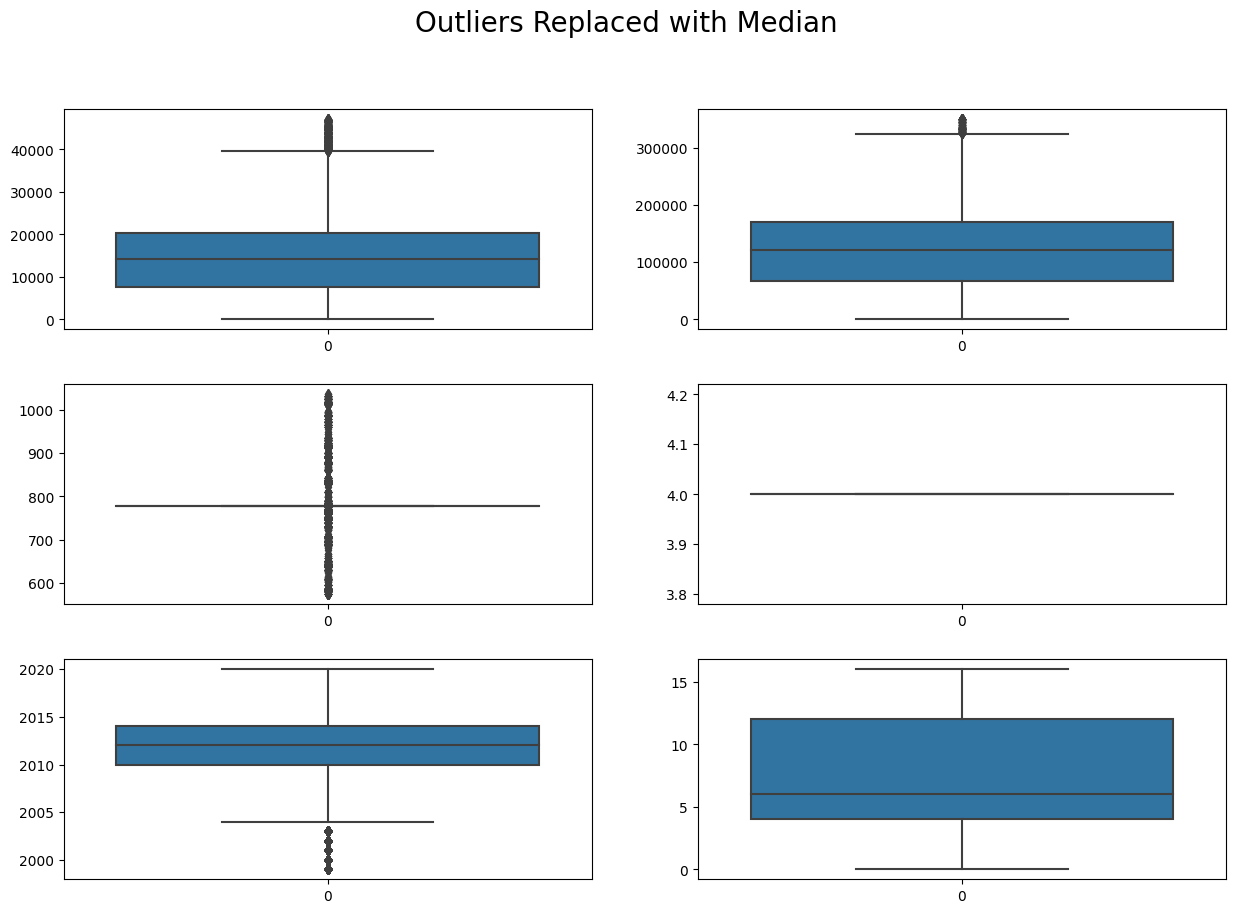

<Figure size 1000x1000 with 0 Axes>

In [54]:
# Plotting boxplot
fig, axes = plt.subplots(3,2, figsize=(15,10))
plt.figure(figsize=(10,10))
for i, col  in enumerate(num_col):
    sns.boxplot(df_median[col], ax=axes[i%3, i//3])
fig.suptitle("Outliers Replaced with Median", fontsize=20)
fig.subplots_adjust(hspace=0.25)

We can see that replacing outliers with median significantly altered **Levy** and **Cylinder** columns

#### 4.2.2 by replacing outliers with upper and lower bound

In [55]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [56]:
for i in range(len(num_col)):
    print("IQR => {}: {}".format(num_col[i],(outlier_detect(df[num_col],num_col[i]).shape[0])))

IQR => Price: 955
IQR => Levy: 3707
IQR => Prod. year: 756
IQR => Mileage: 506
IQR => Cylinders: 3446
IQR => Airbags: 0


In [57]:
outlier = []
for i in range(len(num_col)):
    if outlier_detect(df[num_col],num_col[i]).shape[0] !=0:
        outlier.append(num_col[i])
outlier

['Price', 'Levy', 'Prod. year', 'Mileage', 'Cylinders']

In [58]:
for i in range(len(outlier)):
    replace_upper(df, outlier[i]) 
    
print("\n*******************************************\n")
for i in range(len(outlier)):
    replace_lower(df, outlier[i])

outlire replace with upper bound - Price
outlire replace with upper bound - Levy
outlire replace with upper bound - Prod. year
outlire replace with upper bound - Mileage
outlire replace with upper bound - Cylinders

*******************************************

outlire replace with lower bound - Price
outlire replace with lower bound - Levy
outlire replace with lower bound - Prod. year
outlire replace with lower bound - Mileage
outlire replace with lower bound - Cylinders


In [59]:
# again checking for any outliers
for i in range(len(num_col)):
    print("IQR => {}: {}".format(num_col[i],(outlier_detect(df[num_col],num_col[i]).shape[0])))

IQR => Price: 0
IQR => Levy: 0
IQR => Prod. year: 0
IQR => Mileage: 0
IQR => Cylinders: 0
IQR => Airbags: 0


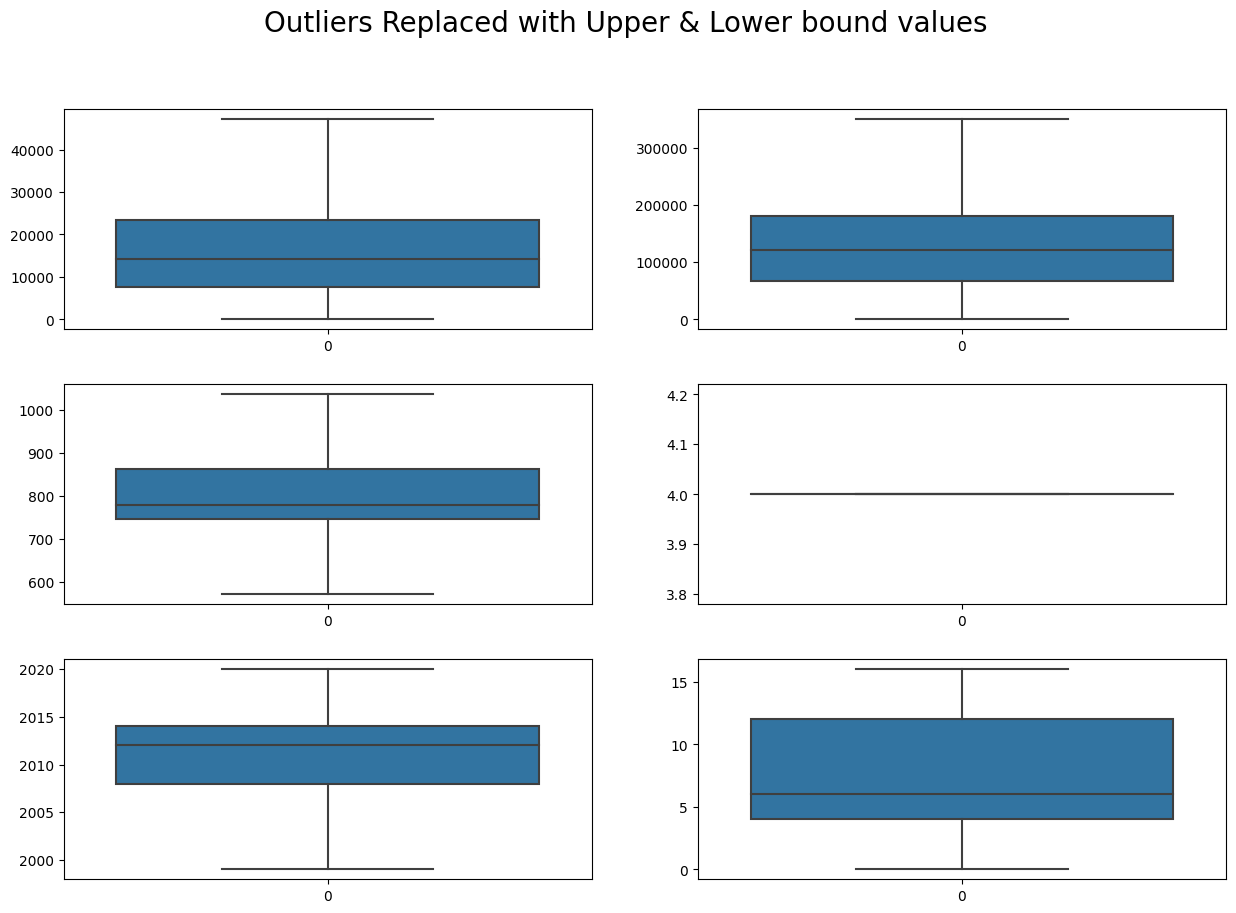

<Figure size 1000x1000 with 0 Axes>

In [60]:
# Plotting boxplot
fig, axes = plt.subplots(3,2, figsize=(15,10))
plt.figure(figsize=(10,10))
for i, col  in enumerate(num_col):
    sns.boxplot(df[col], ax=axes[i%3, i//3])
fig.suptitle("Outliers Replaced with Upper & Lower bound values", fontsize=20)
fig.subplots_adjust(hspace=0.25)

This is better than replacing with median

### 4.3 Checking Correlation among different columns

In [61]:
df_corr = df_median.corr()
df_corr

,Price,Levy,Prod. year,Mileage,Cylinders,Airbags
Price,1.000000,-0.005325,0.265462,-0.120745,NaN,-0.033278
Levy,-0.005325,1.000000,0.006606,-0.014616,NaN,0.015043
Prod. year,0.265462,0.006606,1.000000,-0.337306,NaN,0.184365
Mileage,-0.120745,-0.014616,-0.337306,1.000000,NaN,-0.036930
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN
Airbags,-0.033278,0.015043,0.184365,-0.036930,NaN,1.000000


Text(0.5, 1.0, 'Dataset where outlier replaced with Median')

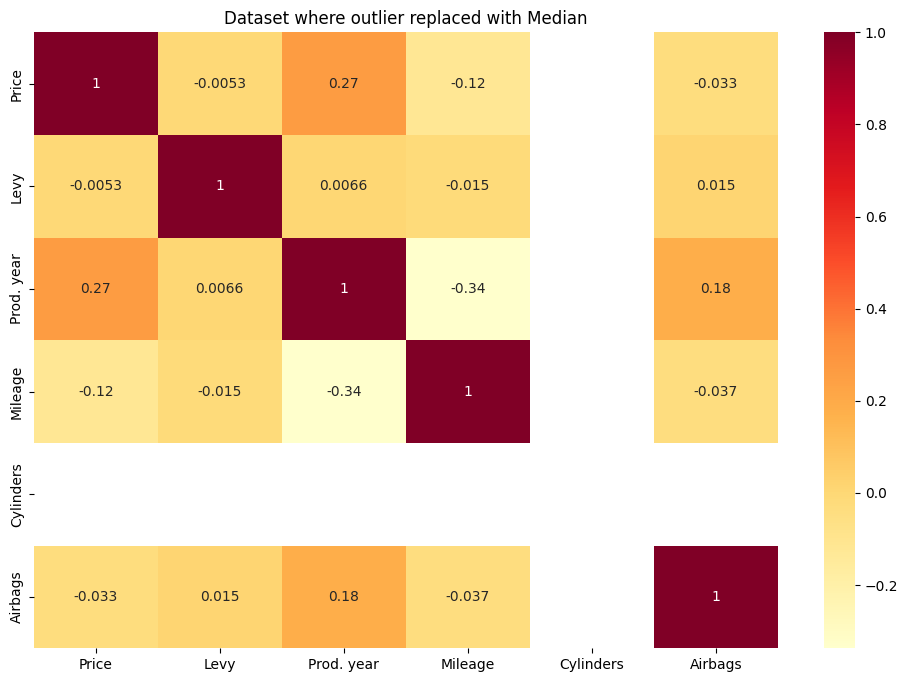

In [62]:
plt.figure(figsize=(12,8))
sns.heatmap(df_corr, cmap="YlOrRd", annot=True)
plt.title("Dataset where outlier replaced with Median")

Text(0.5, 1.0, 'Dataset where outlier replaced with Upper and Lower bound')

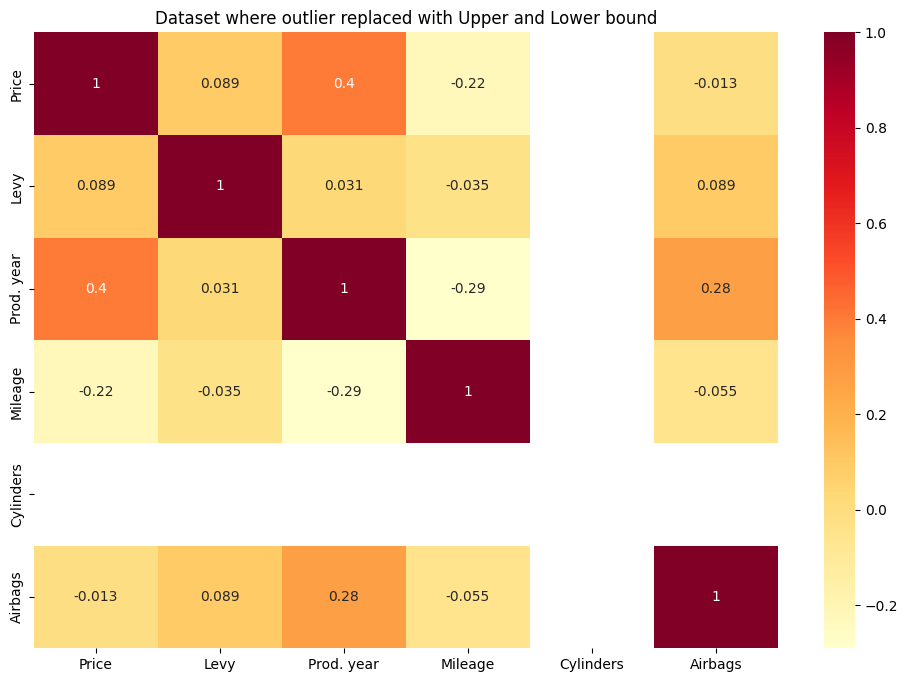

In [63]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="YlOrRd", annot=True)
plt.title("Dataset where outlier replaced with Upper and Lower bound")

From the above we can conclude that **Cylinder** column is not correlated with any column and hence we can remove it

In [64]:
df = df.drop('Cylinders', axis=1)
df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Wheel,Color,Airbags
0,13328.0,1036.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,Automatic,4x4,Left wheel,Silver,12
1,16621.0,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000.0,Tiptronic,4x4,Left wheel,Black,8
2,8467.0,779.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,Variator,Front,Right-hand drive,Black,2
3,3607.0,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,Automatic,4x4,Left wheel,White,0
5,39493.0,891.0,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931.0,Automatic,Front,Left wheel,White,4


<AxesSubplot:>

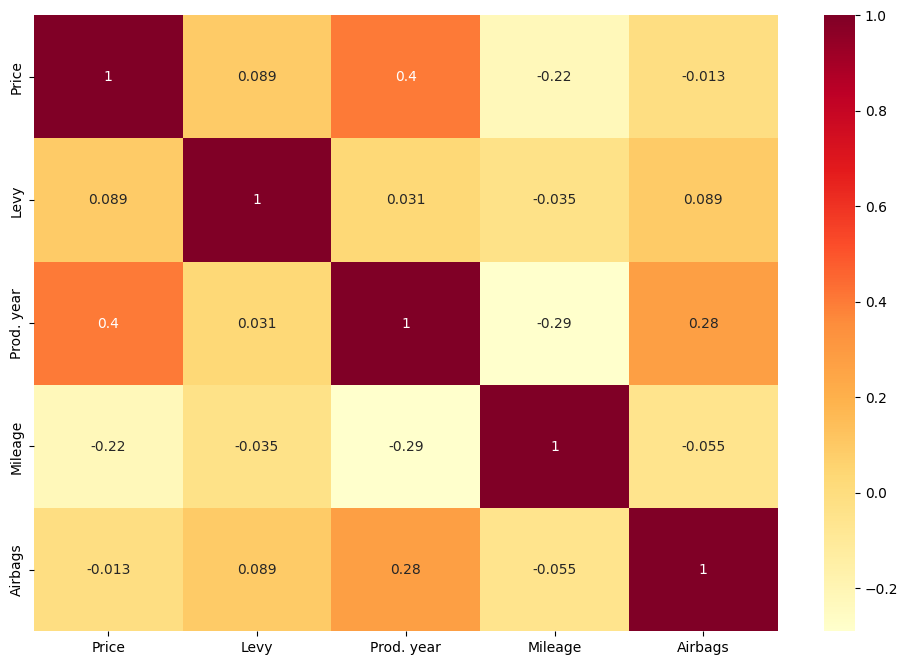

In [65]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="YlOrRd", annot=True)

In [66]:
num_col = df.select_dtypes(exclude='object').columns
num_col

Index(['Price', 'Levy', 'Prod. year', 'Mileage', 'Airbags'], dtype='object')

**Q. Find out how the mileage of a car affects the price.**

From the above correlation matrix we can conclude that as the price increase mileage of the car decreases

**Q. Check production year is the main factor towards the price of a car.**

We can see that the maximum correlation exists between Production year and Price of the car and hence, production year is the main factor of the price for a car.

### 4.4 Performing ANOVA test 

We are doing this to check correlation between a categorical and a numerical column.

**Null hypothesis (H0):** The variables are not correlated with each other

**P-value:** The probability of Null hypothesis being true

**Accept** Null hypothesis if P-value>0.05. Means variables are NOT correlated

**Reject** Null hypothesis if P-value<0.05. Means variables are correlated

In [67]:
df.columns

Index(['Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Gear box type', 'Drive wheels', 'Wheel', 'Color', 'Airbags'],
      dtype='object')

#### Heatmap of Dataset

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15724 entries, 0 to 19236
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             15724 non-null  float64
 1   Levy              15724 non-null  float64
 2   Manufacturer      15724 non-null  object 
 3   Model             15724 non-null  object 
 4   Prod. year        15724 non-null  int64  
 5   Category          15724 non-null  object 
 6   Leather interior  15724 non-null  object 
 7   Fuel type         15724 non-null  object 
 8   Engine volume     15724 non-null  object 
 9   Mileage           15724 non-null  float64
 10  Gear box type     15724 non-null  object 
 11  Drive wheels      15724 non-null  object 
 12  Wheel             15724 non-null  object 
 13  Color             15724 non-null  object 
 14  Airbags           15724 non-null  int64  
dtypes: float64(3), int64(2), object(10)
memory usage: 2.4+ MB


In [69]:
grp_engine_price = df.groupby('Engine volume')['Price'].apply(list)
result = f_oneway(*grp_engine_price)
print('P-value for ANOVA test is %  and F-value is %f' % (result[1], result[0]))
print("P-value (",result[1],") < 0.05 : ",result[1]<0.05)

P-value for ANOVA test is 0.0nd F-value is 24.339982
P-value ( 0.0 ) < 0.05 :  True


As P-value < 0.05 so we reject Null hypothesis. Hence, **Engine volume** of car is correlated to the **Price**

**Q. Does engine volume affect a price?**

**Yes, Engine volume** significantly affects the **Price**.

In [70]:
grp_engine_mileage = df.groupby('Engine volume')['Mileage'].apply(list)
result = f_oneway(*grp_engine_mileage)
print('P-value for ANOVA test is %.10f  and F-value is %f' % (result[1], result[0]))
print("P-value (",round(result[1],10),") < 0.05 : ",result[1]<0.05)

P-value for ANOVA test is 0.0000000000  and F-value is 8.454256
P-value ( 0.0 ) < 0.05 :  True


As P-value < 0.05 so we reject Null hypothesis. Hence, **Engine volume** of car is correlated to the **Mileage**. But F-value is less and hence, they are weakly correlated.

**Q. What impact does engine volume have on the mileage of the car?**

**Engine volume** have a very little impact on **Mileage**

In [71]:
grp_model_mileage = df.groupby('Model')['Mileage'].apply(list)
result = f_oneway(*grp_model_mileage)
print('P-value for ANOVA test is %.10f  and F-value is %f' % (result[1], result[0]))
print("P-value (",round(result[1],10),") < 0.05 : ",result[1]<0.05)

P-value for ANOVA test is 0.0000000000  and F-value is 2.745829
P-value ( 0.0 ) < 0.05 :  True


As P-value > 0.05 so we accept Null hypothesis. Hence, **Model** of car is not correlated to it's **Mileage**.

**Q. How model and mileage of a car correlate with each other.**

**Model** of car is not correlated to it's **Mileage**.


In [72]:
grp_fuel_price = df.groupby('Fuel type')['Price'].apply(list)
result = f_oneway(*grp_fuel_price)
print('P-value for ANOVA test is % and F-value is %f' % (result[1], result[0]))
print("P-value (",result[1],") < 0.05 : ",result[1]<0.05)

P-value for ANOVA test is 0.0nd F-value is 265.599385
P-value ( 0.0 ) < 0.05 :  True


As P-value < 0.05 so we reject Null hypothesis. Hence, there is a correlation between Fuel types and Price of a car.

Further, the F-value is greater thus, we can conclude that **Fuel types** highly effect on **Price** hike of a car. 

**Q. Check whether fuel types highly effect on price hike of a car.**

**Yes, Fuel types** highly affects **Price** hike of a car 

In [73]:
grp_color_price = df.groupby('Color')['Price'].apply(list)
result = f_oneway(*grp_color_price)
print('P-value for ANOVA test is % and F-value is %f' % (result[1], result[0]))
print("P-value (",result[1],") < 0.05 : ",result[1]<0.05)

P-value for ANOVA test is 1.2670109587896216e-83nd F-value is 29.514147
P-value ( 1.2670109587896216e-83 ) < 0.05 :  True


As P-value < 0.05 so we reject Null hypothesis. Hence, color of car is correlated to the price.


**Q. Check whether the color of a car impact on price or not.**

**Yes,Color** of car directly impacts it's **Price**

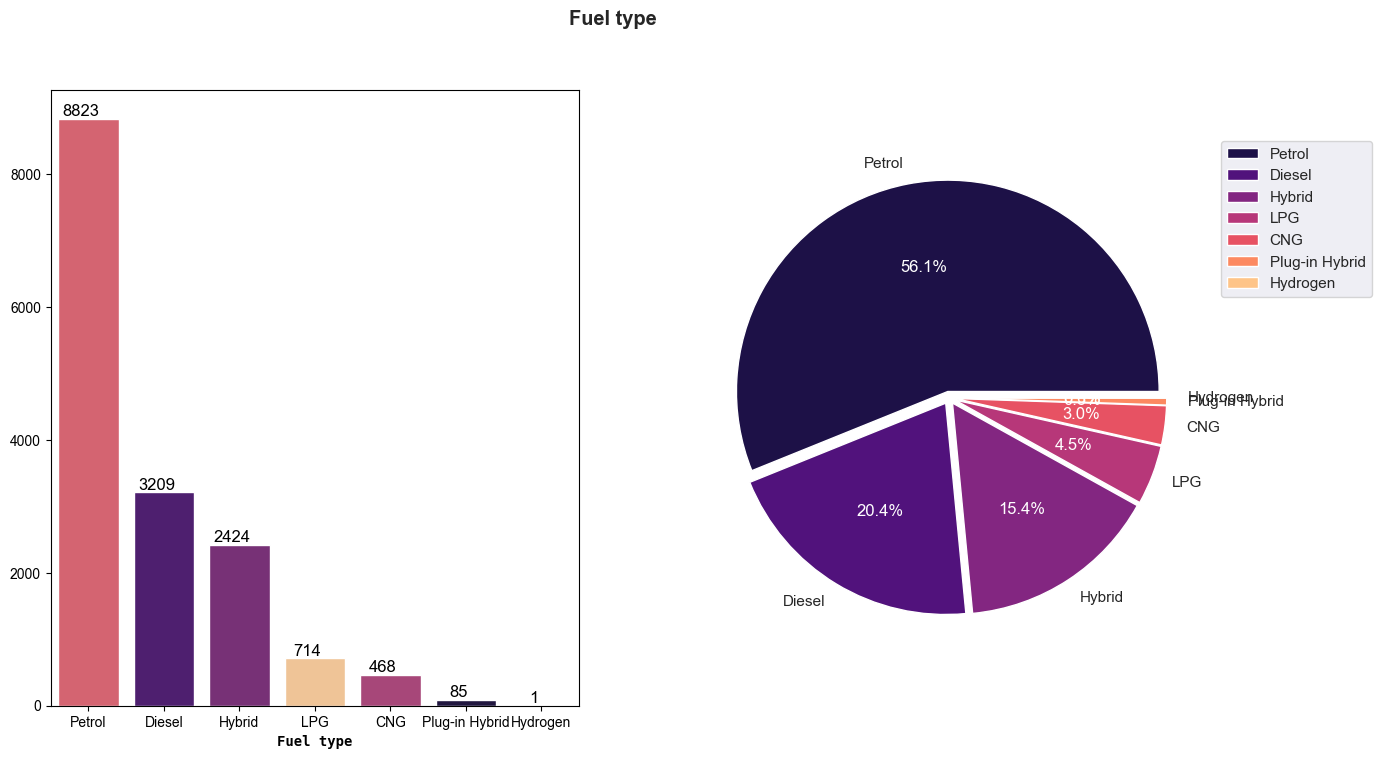

In [74]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=df['Fuel type'].value_counts().index
y=df['Fuel type'].value_counts().values.tolist()
data = df.groupby("Fuel type").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('Fuel type', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['Fuel type'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('Fuel type',weight = 'bold')
plt.show()

In [75]:
df['Gear box type'].value_counts()

Automatic    10087
Tiptronic     3064
Manual        1841
Variator       732
Name: Gear box type, dtype: int64

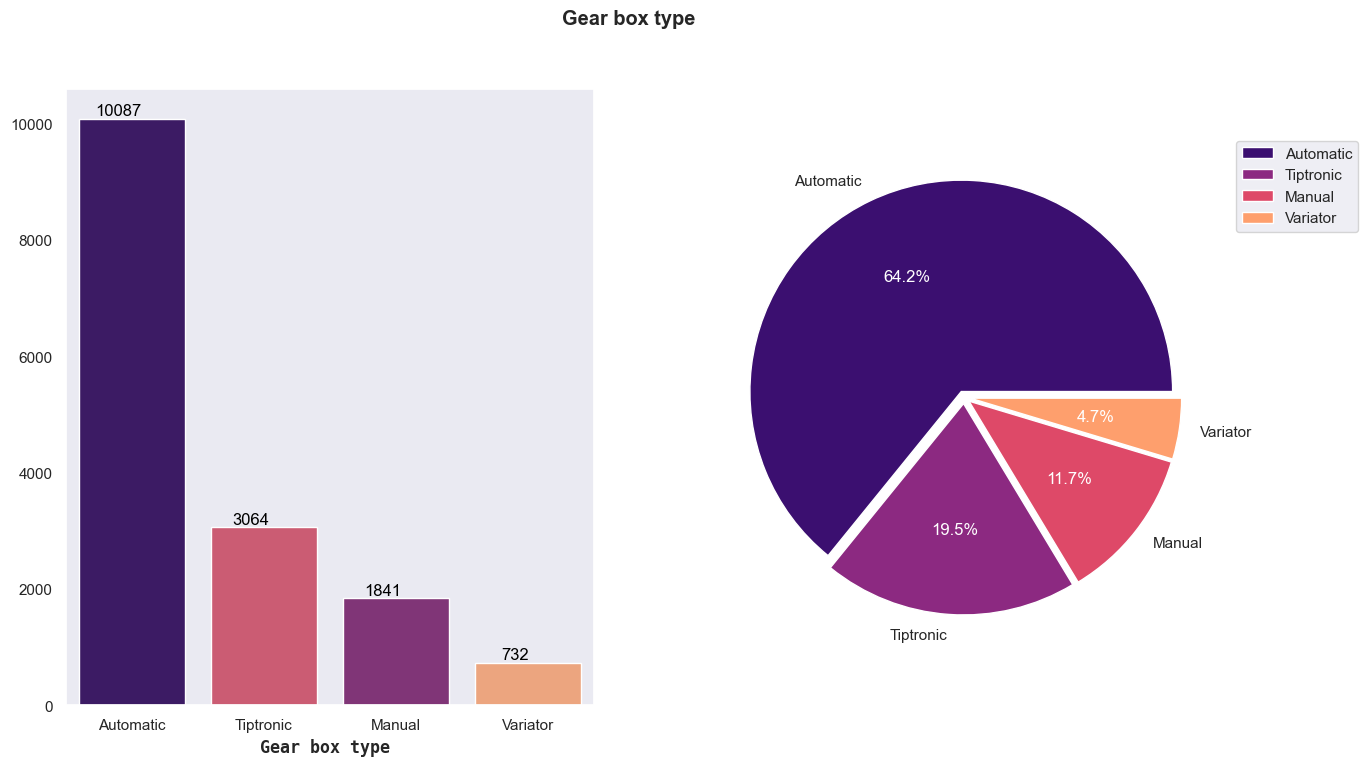

In [76]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=df['Gear box type'].value_counts().index
y=df['Gear box type'].value_counts().values.tolist()
data = df.groupby("Gear box type").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('Gear box type ', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['Gear box type'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('Gear box type',weight = 'bold')
plt.show()

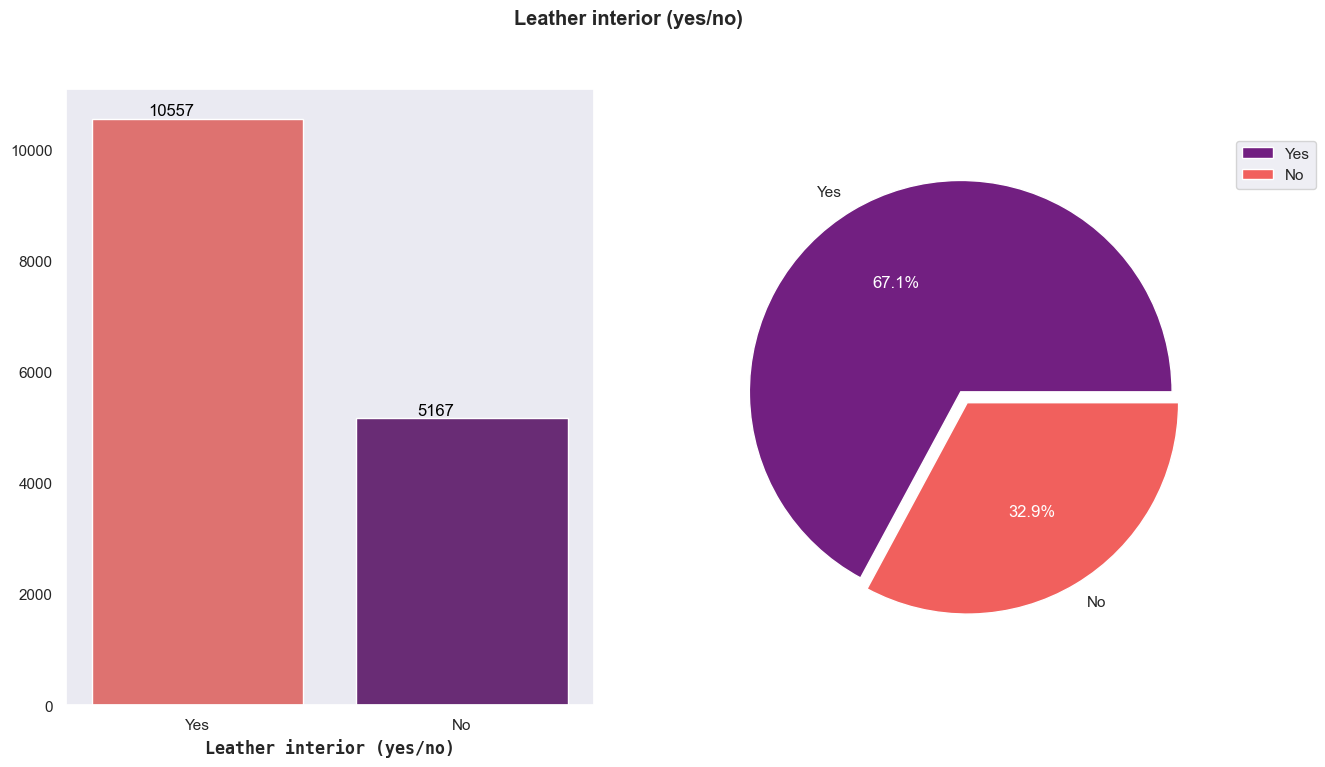

In [77]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=df['Leather interior'].value_counts().index
y=df['Leather interior'].value_counts().values.tolist()
data = df.groupby("Leather interior").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('Leather interior (yes/no)', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['Leather interior'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('Leather interior (yes/no)',weight = 'bold')
plt.show()

Text(0.5, 1.0, 'Wheel vs Price')

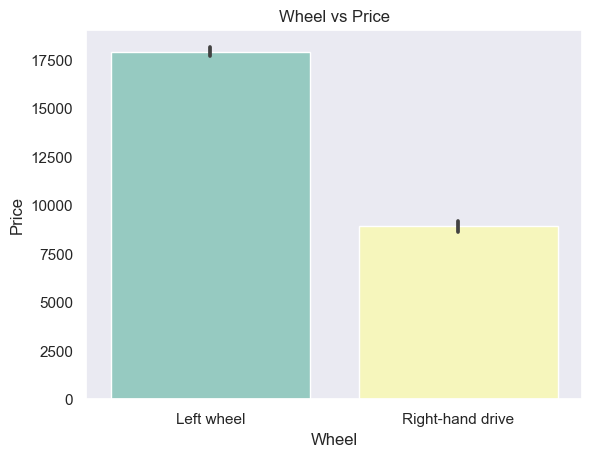

In [78]:
sns.barplot(data=df,x='Wheel', y='Price', palette='Set3')
plt.title("Wheel vs Price")

We can see left wheel type is expensive than right wheel 

Text(0.5, 1.0, 'Drive Wheel vs Price')

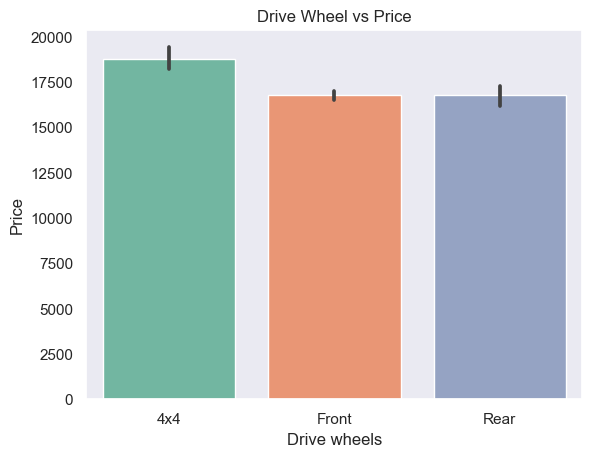

In [79]:
sns.barplot(data=df,x='Drive wheels', y='Price', palette='Set2')
plt.title("Drive Wheel vs Price")

<AxesSubplot:xlabel='Price', ylabel='Manufacturer'>

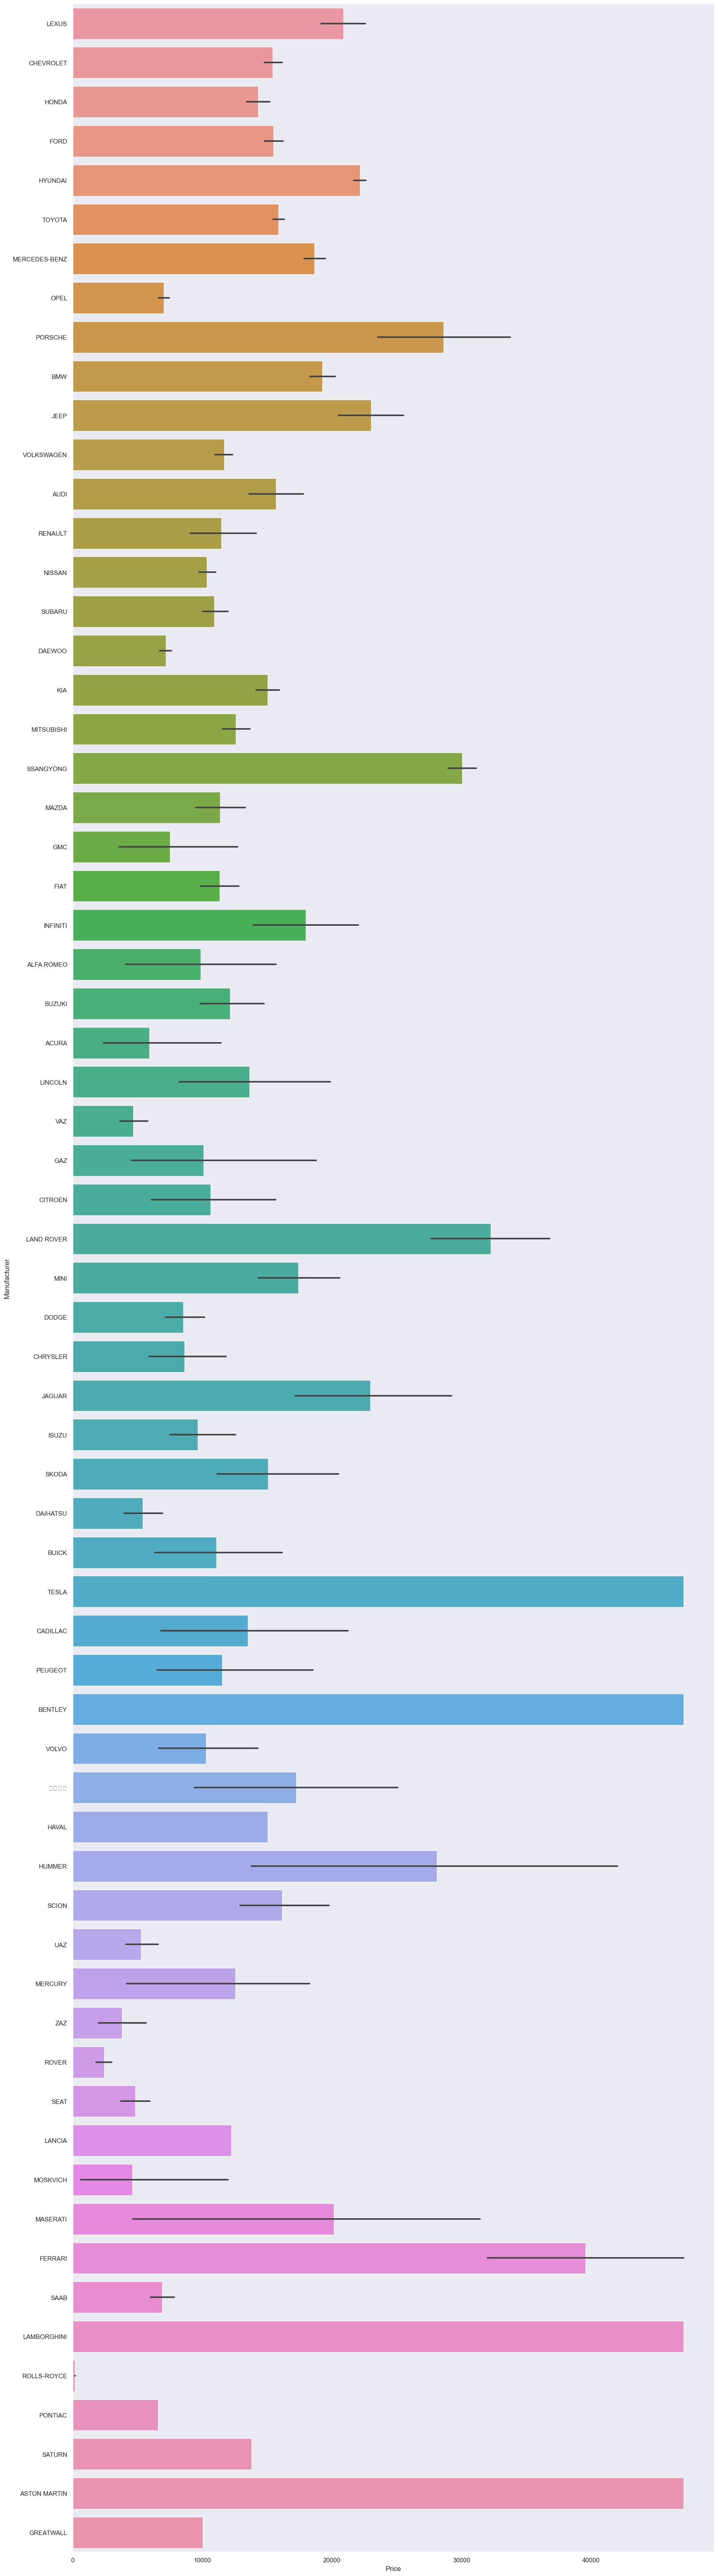

In [80]:
plt.figure(figsize=(20,80))
sns.barplot(data=df, y='Manufacturer', x='Price')

<AxesSubplot:xlabel='Levy', ylabel='Count'>

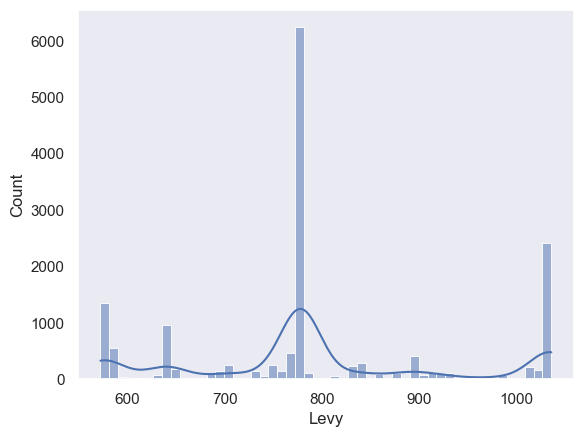

In [81]:
sns.histplot(df['Levy'], kde=True)

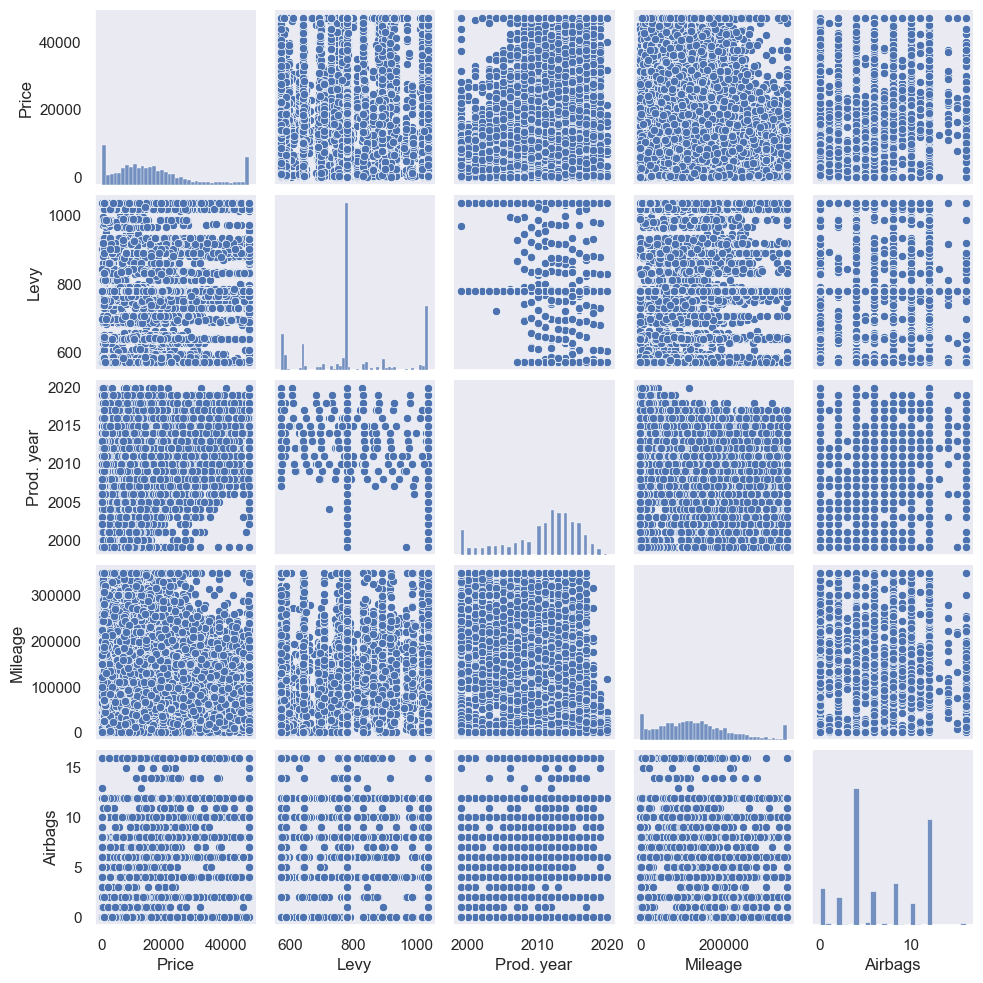

In [82]:
sns.pairplot(data=df[num_col],height=2)

## 5. Data Preparation

### 5.1 Label Encoding

In [83]:
def label_encoding(col):
    label_encoder = LabelEncoder()
    df[col]= label_encoder.fit_transform(df[col])
    df[col].unique()

In [84]:
for i in cat_col:
    label_encoding(i)

In [85]:
df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Wheel,Color,Airbags
0,13328.0,1036.0,32,1242,2010,4,1,2,63,186005.0,0,0,0,12,12
1,16621.0,1018.0,8,658,2011,4,0,5,56,192000.0,2,0,0,1,8
2,8467.0,779.0,21,684,2006,3,0,5,22,200000.0,3,1,1,1,2
3,3607.0,862.0,16,661,2011,4,1,2,46,168966.0,0,0,0,14,0
5,39493.0,891.0,23,1305,2016,4,1,1,36,160931.0,0,1,0,14,4


Heatmap of entire dataset after Label Encoding

<AxesSubplot:>

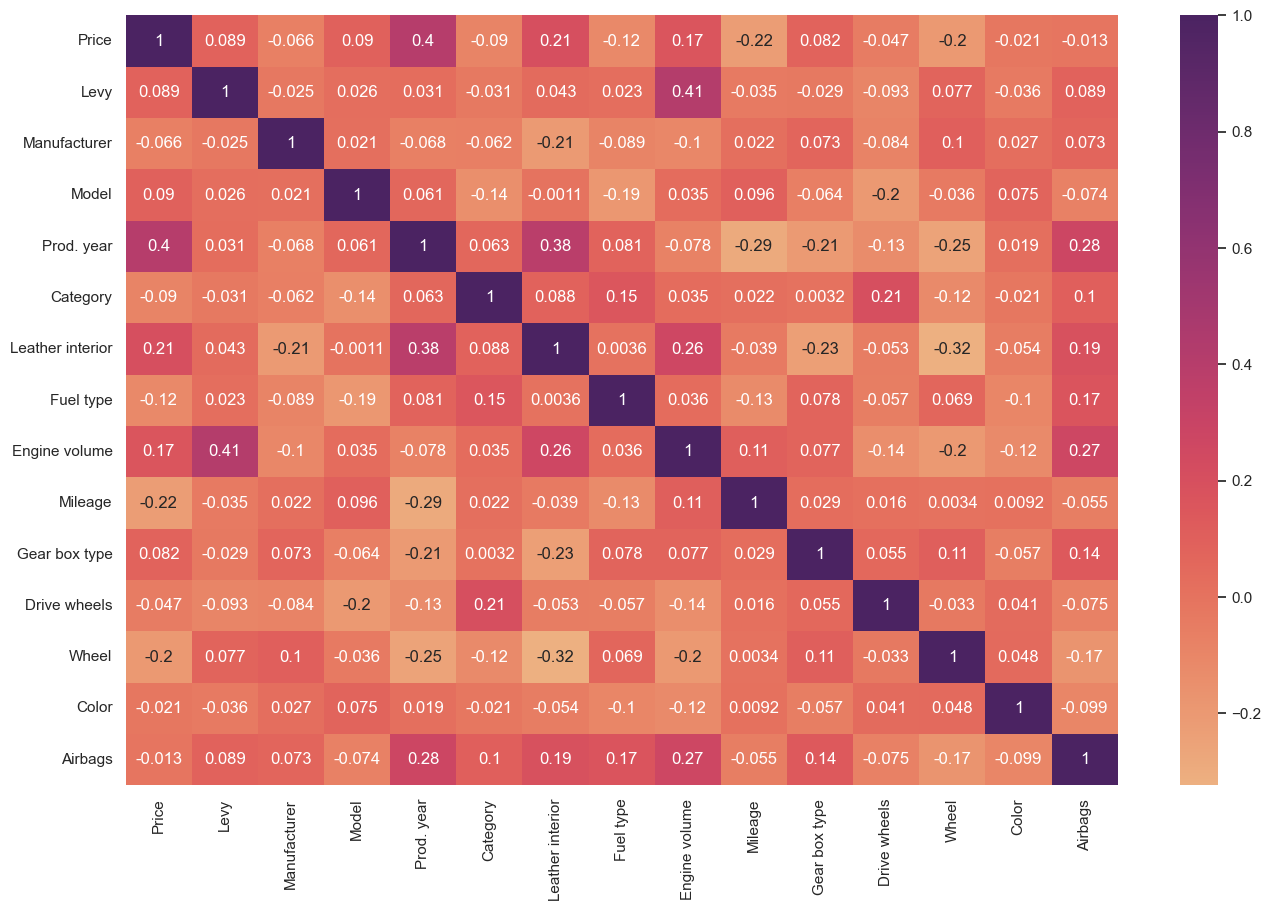

In [86]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),cmap='flare', annot=True)

### 5.2 Splitting the Dataset

In [87]:
# df = dff

In [88]:
X = df.drop('Price',axis=1)
Y = df['Price']

In [89]:
# To have same rows in train and test data always 
np.random.seed(12)

#  Dividing the dataset into 70/30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,Y, train_size=0.7, test_size=0.3, random_state=20)

In [90]:
X_train.head()

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Wheel,Color,Airbags
12575,891.0,23,635,2016,9,0,5,36,20900.0,2,1,0,2,8
19058,1036.0,24,1198,2012,4,1,5,94,149466.0,0,2,0,7,12
11311,595.0,58,1162,2015,3,0,5,26,71300.0,0,1,0,14,6
8490,707.0,23,1442,2011,4,1,1,36,68047.0,0,1,0,1,4
7693,779.0,21,684,2006,3,0,5,26,140000.0,3,1,1,1,4


In [91]:
X_test.head()

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Wheel,Color,Airbags
13965,779.0,41,1518,2000,4,0,0,61,150000.0,0,0,0,12,4
7193,585.0,58,1154,2013,9,1,2,32,114526.0,0,1,0,14,12
14408,707.0,54,1226,2011,4,1,1,36,221319.0,0,1,0,7,4
16119,1036.0,18,242,2001,8,1,5,84,335739.0,0,2,0,6,12
4709,779.0,45,1115,2010,9,1,5,84,57000.0,2,2,0,14,12


### 5.3 Feature Scaling

In [92]:
num_col

Index(['Price', 'Levy', 'Prod. year', 'Mileage', 'Airbags'], dtype='object')

In [93]:
num_col = num_col[1:]
num_col


Index(['Levy', 'Prod. year', 'Mileage', 'Airbags'], dtype='object')

In [94]:
cols = X_train.columns
cols

Index(['Levy', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Gear box type', 'Drive wheels', 'Wheel', 'Color', 'Airbags'],
      dtype='object')

In [95]:
scaler = MinMaxScaler() # as we have earlier seen that our data is not normally distributed
X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_test[num_col]  = scaler.fit_transform(X_test[num_col])

In [96]:
X_train.head()

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Wheel,Color,Airbags
12575,0.687500,23,635,0.809524,9,0,5,36,0.059690,2,1,0,2,0.500
19058,1.000000,24,1198,0.619048,4,1,5,94,0.426870,0,2,0,7,0.750
11311,0.049569,58,1162,0.761905,3,0,5,26,0.203631,0,1,0,14,0.375
8490,0.290948,23,1442,0.571429,4,1,1,36,0.194340,0,1,0,1,0.250
7693,0.446121,21,684,0.333333,3,0,5,26,0.399836,3,1,1,1,0.250


<AxesSubplot:>

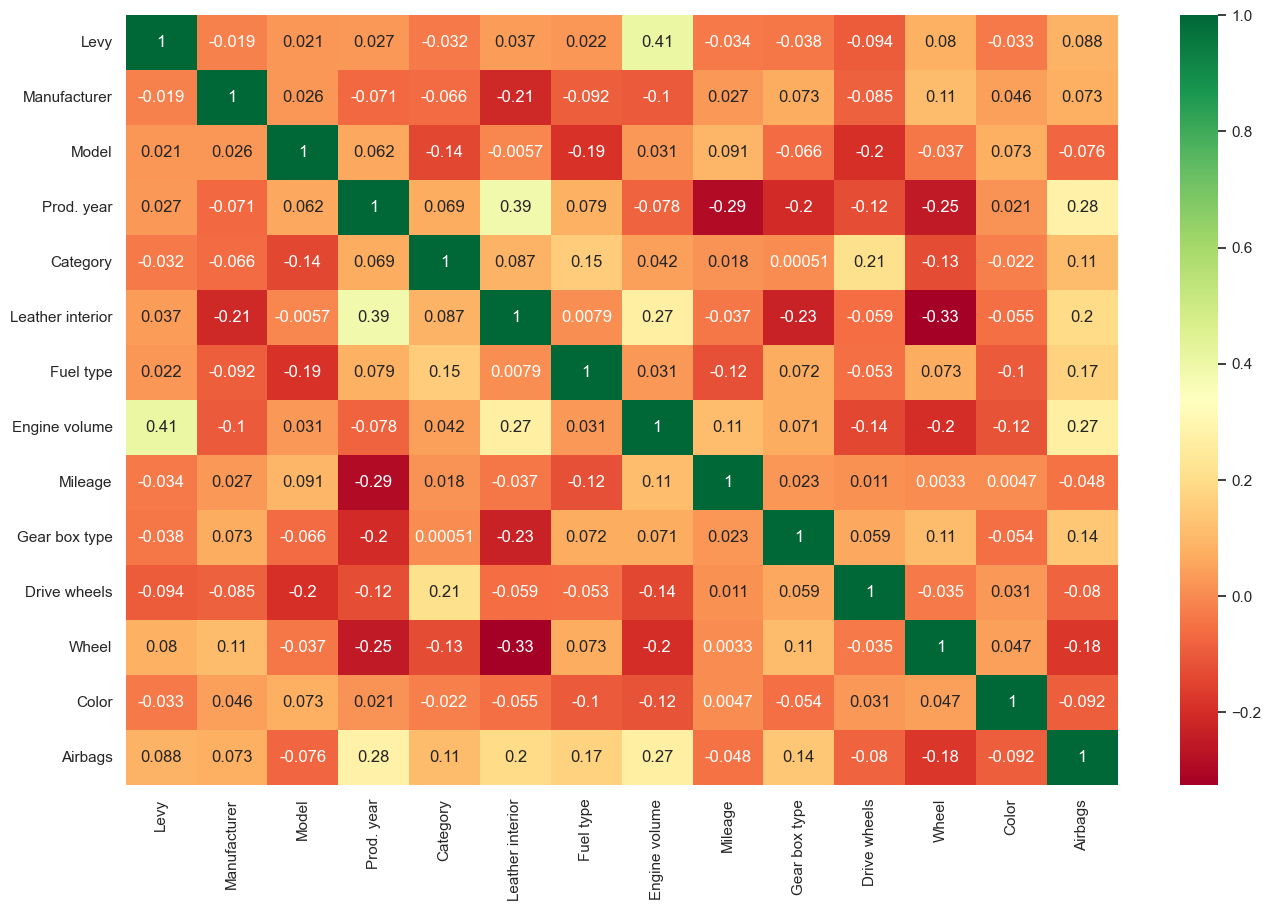

In [97]:
plt.figure(figsize=(16,10))
sns.heatmap(X_train.corr(), annot=True, cmap='RdYlGn')

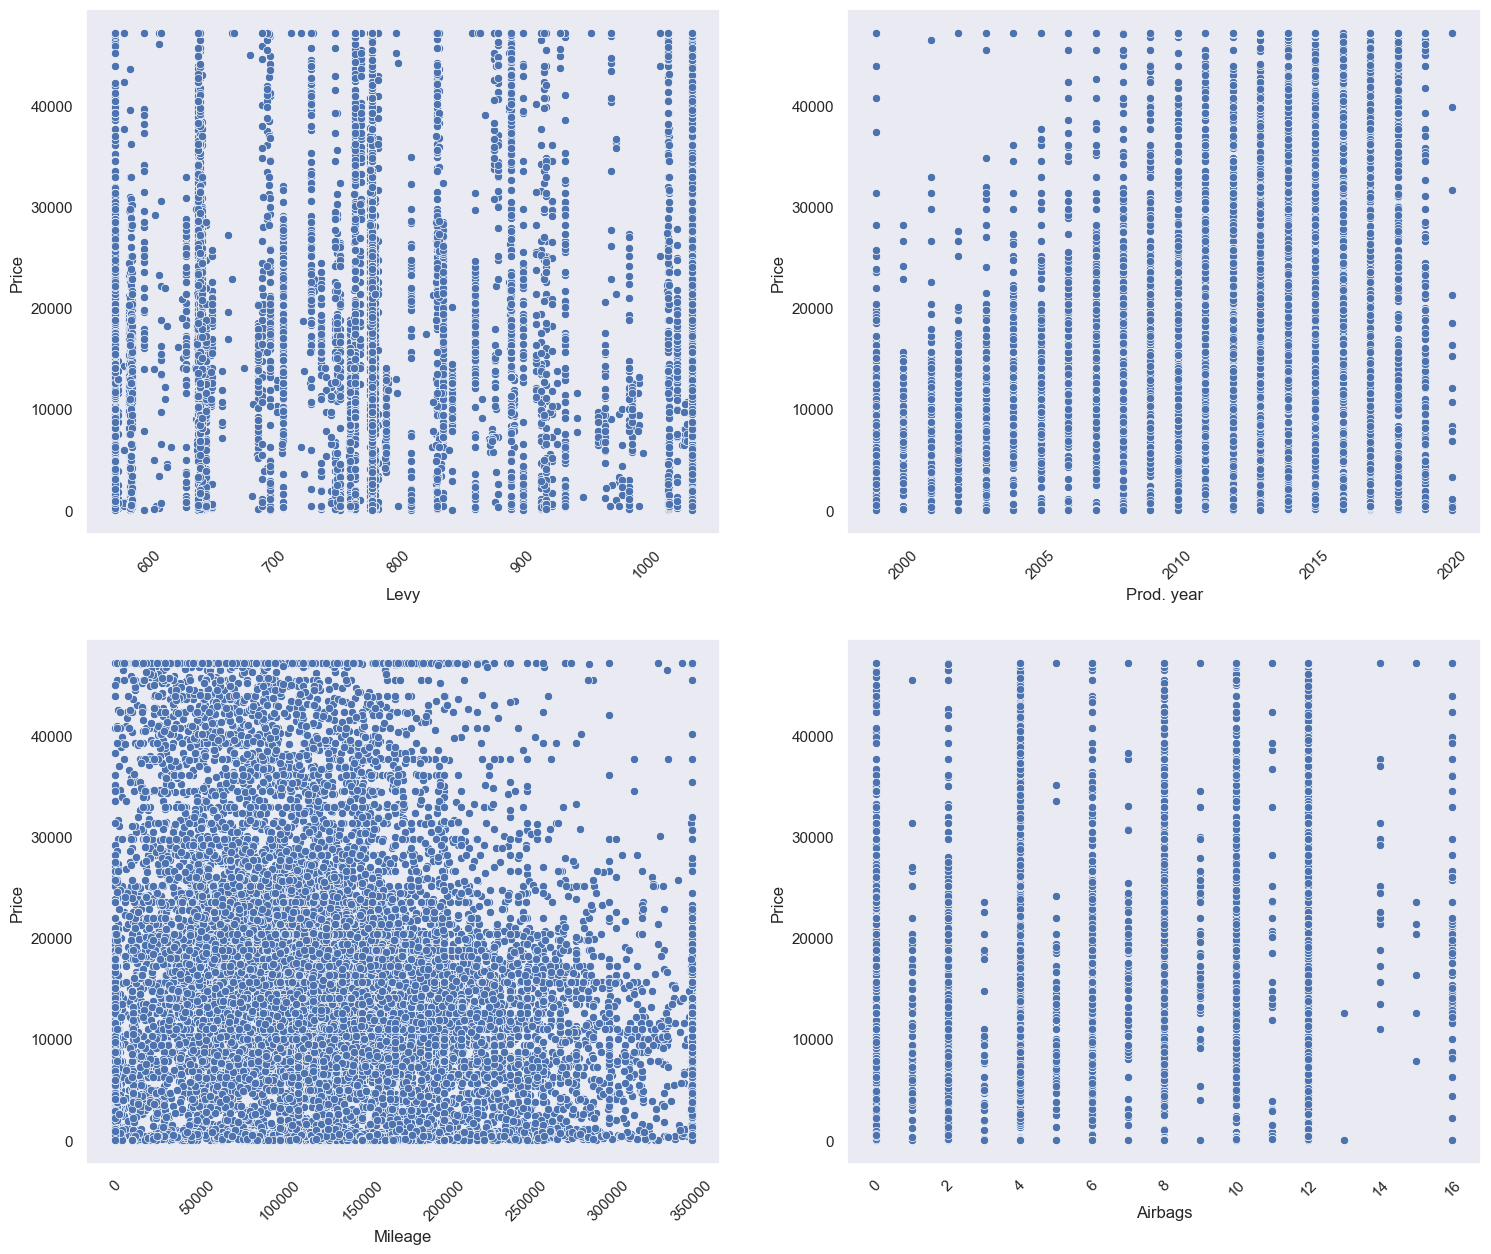

In [98]:
fig,axes = plt.subplots(2,2,figsize=(18,15))
for seg,col in enumerate(num_col):
    x,y = seg//2,seg%2
    an=sns.scatterplot(x=col, y='Price' ,data=df, ax=axes[x,y])
    plt.setp(an.get_xticklabels(), rotation=45)

### 5.3 Feature Selection


In [99]:
forest = RandomForestRegressor()
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.7300937747749122

Using all features we are getting an accuracy of 71.2%

In [100]:
X_train.columns

Index(['Levy', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Gear box type', 'Drive wheels', 'Wheel', 'Color', 'Airbags'],
      dtype='object')

#### Removing featues using Recursive Feature Elimination RFE

In [119]:
rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=15)
rfe.fit(X_train, y_train)
_ = forest.fit(rfe.transform(X_train), y_train)
forest.score(rfe.transform(X_test), y_test)

0.7297200853991176

In [102]:
rfecv = RFECV(
    estimator=LinearRegression(),
    min_features_to_select=5,
    step=1,
    n_jobs=-1,
    scoring="r2",
    cv=5,
)
rfecv.fit(X_train, y_train)

RFECV(cv=5, estimator=LinearRegression(), min_features_to_select=5, n_jobs=-1,
      scoring='r2')

In [103]:
X_train.columns[rfecv.support_]

Index(['Levy', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Gear box type', 'Drive wheels', 'Wheel', 'Color', 'Airbags'],
      dtype='object')

The algorithm suggests to keep all the variables

## 6. Model Building

#### Metrics Calculation

In [104]:
def cal_metrics(model):
    pred = model.predict(X_test)
    mse = metrics.mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    r2 = metrics.r2_score(y_test, pred)
    acc = round(model.score(X_test, y_test)*100, 2)
    print("Analysis of Results of Model:")
    print("Accuracy : ",acc,"%")
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R-Squared:", r2)

#### 1. Linear Regression

In [105]:
lr = LinearRegression(normalize = True)
lm = lr.fit(X_train, y_train)

In [106]:
pred = lr.predict(X_test)
pred

array([12203.19481911, 13063.86515703, 18874.10460016, ...,
       18373.23027318, 28113.84052145, 21849.57836922])

In [107]:
lr.score(X_test, y_test) * 100

35.15473233202982

In [108]:
cal_metrics(lm)

Analysis of Results of Model:
Accuracy :  35.15 %
MSE: 113048710.49980177
RMSE: 10632.436715062158
R-Squared: 0.35154732332029826


<Figure size 1200x1000 with 0 Axes>

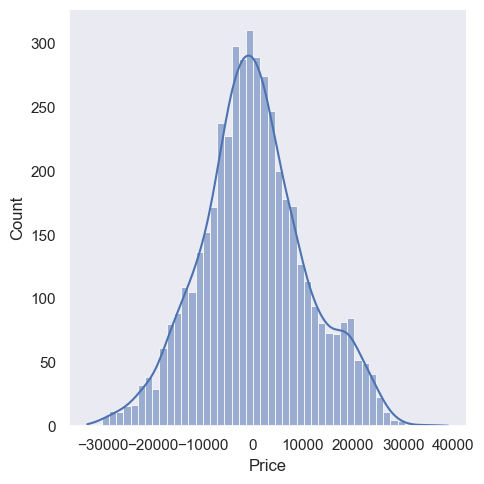

In [109]:
plt.figure(figsize=(12,10))
sns.displot(y_test-pred,bins = 50,kde = True)
plt.show()

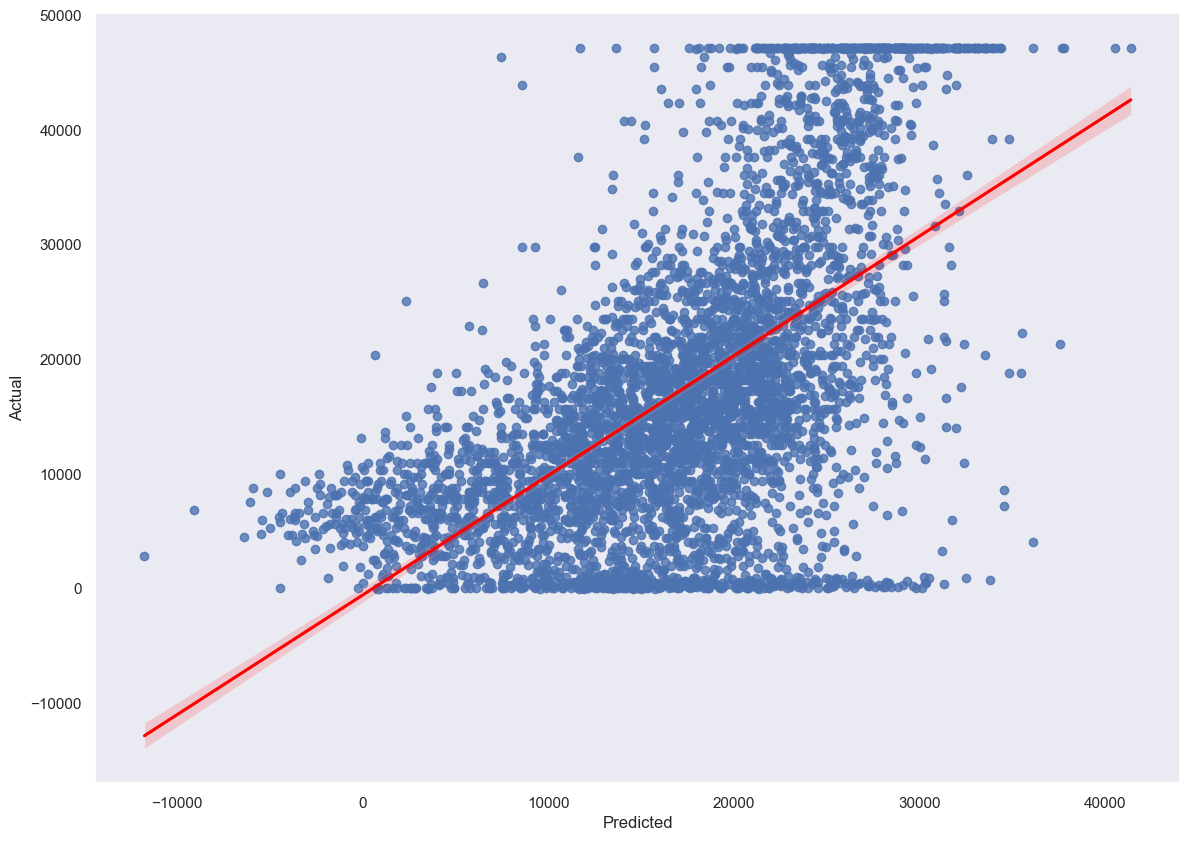

In [110]:
plt.figure(figsize=[14,10])
sns.regplot(y=y_test,x=pred, line_kws={"color": "red"} )
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### 2. Random Forest

In [111]:
rf = RandomForestRegressor()
rfm = rf.fit(X_train, y_train)


In [112]:
pred = rfm.predict(X_test)
pred

array([10128.44   ,  7070.62   , 18118.96   , ..., 20339.82   ,
       46886.95375,  5587.27625])

<Figure size 1200x1000 with 0 Axes>

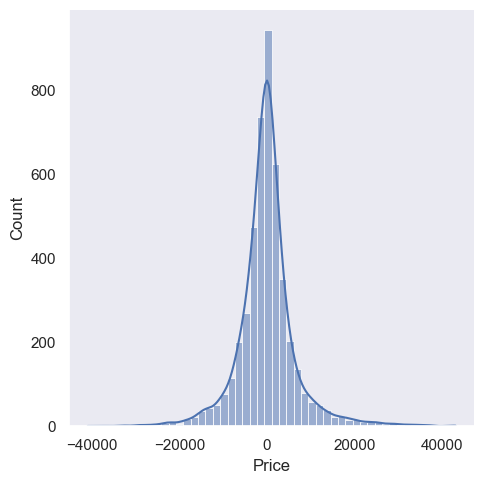

In [113]:
plt.figure(figsize=(12,10))
sns.displot(y_test-pred,bins = 50,kde = True)
plt.show()

In [114]:
rfm.score(X_test, y_test)*100

73.14988224494081

In [115]:
cal_metrics(rfm)

Analysis of Results of Model:
Accuracy :  73.15 %
MSE: 46809448.06210696
RMSE: 6841.743057299576
R-Squared: 0.7314988224494081


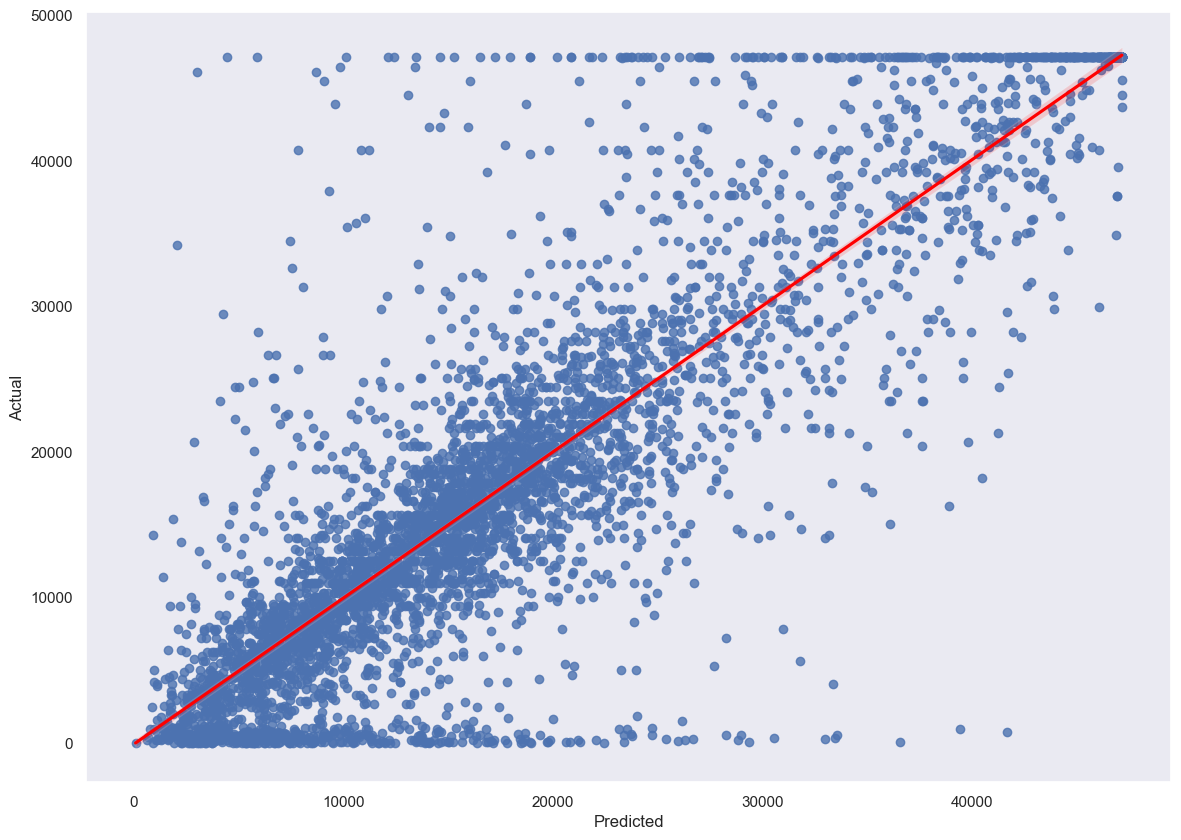

In [116]:
plt.figure(figsize=[14,10])
sns.regplot(y=y_test,x=pred, line_kws={"color": "red"} )
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()